In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c multilabel-bird-species-classification-nips2013

100% 294M/294M [00:09<00:00, 35.3MB/s]
100% 294M/294M [00:09<00:00, 31.2MB/s]


In [ ]:
! unzip multilabel-bird-species-classification-nips2013.zip

In [ ]:
! kaggle datasets download -d gpiosenka/100-bird-species
# ! kaggle kernels pull themlphdstudent/food-classification-using-inceptionv3
# !kaggle kernels pull theimgclist/multiclass-food-classification-using-tensorflow
# !kaggle datasets download -d synysterjeet/food-classification

100% 1.69G/1.69G [00:50<00:00, 34.9MB/s]
100% 1.69G/1.69G [00:50<00:00, 36.1MB/s]


In [ ]:
! unzip 100-bird-species.zip
# ! unzip kaggle kernels pull themlphdstudent/food-classification-using-inceptionv3
# ! unzip kaggle kernels pull theimgclist/multiclass-food-classification-using-tensorflow.zip
# !unzip food-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/VIOLET TURACO/129.jpg  
  inflating: train/VIOLET TURACO/130.jpg  
  inflating: train/VIOLET TURACO/131.jpg  
  inflating: train/VIOLET TURACO/132.jpg  
  inflating: train/VIOLET TURACO/133.jpg  
  inflating: train/VIOLET TURACO/134.jpg  
  inflating: train/VIOLET TURACO/135.jpg  
  inflating: train/VIOLET TURACO/136.jpg  
  inflating: train/VIOLET TURACO/137.jpg  
  inflating: train/VIOLET TURACO/138.jpg  
  inflating: train/VIOLET TURACO/139.jpg  
  inflating: train/VIOLET TURACO/140.jpg  
  inflating: train/VIOLET TURACO/141.jpg  
  inflating: train/VIOLET TURACO/142.jpg  
  inflating: train/VIOLET TURACO/143.jpg  
  inflating: train/VIOLET TURACO/144.jpg  
  inflating: train/VIOLET TURACO/145.jpg  
  inflating: train/VIOLET TURACO/146.jpg  
  inflating: train/VIOLET TURACO/147.jpg  
  inflating: train/VIOLET TURACO/148.jpg  
  inflating: train/VIOLET TURACO/149.jpg  
  inflating: train/VIOLET TURACO/150.jpg  
  i

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from glob import glob
from keras.models import Sequential

In [ ]:
# data_dir = '/content/train'
# data = tf.keras.preprocessing.image_dataset_from_directory(data_dir)
train_path = "/content/train"
test_path = "/content/test"
validation_path = "/content/valid"

In [ ]:
# datagen = ImageDataGenerator(rescale= 1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest', validation_split=0.2)

In [ ]:
height = 229
width = 229
channels = 3
batch_size = 32
img_shape = (height, width, channels)
img_size = (height, width)

In [ ]:
datagen = ImageDataGenerator(rescale= 1./255, width_shift_range=0.2, height_shift_range=0.2,shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest', validation_split=0.2)

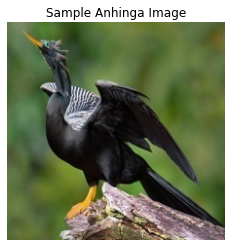

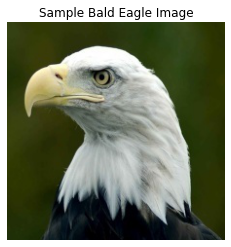

In [ ]:
img = load_img(train_path + "/ANHINGA/001.jpg")
plt.imshow(img)
plt.axis("off")
plt.title("Sample Anhinga Image")
plt.show()

plt.figure()

img = load_img(train_path + "/BALD EAGLE/018.jpg")
plt.imshow(img)
plt.axis("off")
plt.title("Sample Bald Eagle Image")
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

In [ ]:
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1/255,
                  shear_range=0.3,
                  horizontal_flip=True,
                  zoom_range=0.3
                  )
val_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
                train_path,
                target_size=(224,224),
                batch_size=batch_size,
                color_mode="rgb",
                class_mode="categorical"
                )

val_generator = val_datagen.flow_from_directory(
                validation_path,
                target_size=(224,224),
                batch_size=batch_size,
                color_mode="rgb",
                class_mode="categorical"
                )

Found 70626 images belonging to 450 classes.
Found 2250 images belonging to 450 classes.


In [ ]:
# train_data = datagen.flow_from_directory(data_dir, target_size=img_size, batch_size=batch_size, class_mode = 'categorical', subset='training')

Found 56677 images belonging to 450 classes.


In [ ]:
# val_data = datagen.flow_from_directory(data_dir, target_size = img_size, batch_size=batch_size, class_mode='categorical', subset = 'validation')

Found 13949 images belonging to 450 classes.


In [ ]:
num_classes = len(data.class_names)
print('.... Number of Classes : {0} ....'.format(num_classes))

.... Number of Classes : 450 ....


In [ ]:
base_model = tf.keras.applications.InceptionV3(include_top=False)

# 2. Freezing The Base Model
base_model.trainable = False

# 3. Creating Inputs Into Our Model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name='InputLayer')

# 4. Passing The Inputs To The Base Model
x = base_model(inputs)

# 5. Average Pooling The Outputs Of The Base Model
x = tf.keras.layers.GlobalAveragePooling2D(name='GlobalAveragePoolingLayer')(x)

# 6. Creating The Output Activation Layer
outputs = tf.keras.layers.Dense(450, activation='softmax', name='OutputLayer')(x)

# 7. Combining The Inputs With The Outputs Into A Model
model_0 = tf.keras.Model(inputs, outputs)

# 8. Compiling The Model
model_0.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
# 9. Fitting The Model
history_0 = model_0.fit(train_generator,
                       epochs=10,
                       steps_per_epoch=len(train_generator),
                       validation_data=val_generator,
                       validation_steps=int(0.25*len(val_generator)))

Epoch 1/10
2208/2208 [==============================] - 783s 352ms/step - loss: 1.8860 - accuracy: 0.5649 - val_loss: 0.8887 - val_accuracy: 0.7702
Epoch 2/10
2208/2208 [==============================] - 773s 350ms/step - loss: 1.1362 - accuracy: 0.7164 - val_loss: 0.6929 - val_accuracy: 0.7941
Epoch 3/10
2208/2208 [==============================] - 773s 350ms/step - loss: 0.9587 - accuracy: 0.7590 - val_loss: 0.7204 - val_accuracy: 0.7941
Epoch 4/10
2208/2208 [==============================] - 772s 350ms/step - loss: 0.8695 - accuracy: 0.7826 - val_loss: 0.5688 - val_accuracy: 0.8346
Epoch 5/10
2208/2208 [==============================] - 774s 350ms/step - loss: 0.7888 - accuracy: 0.8018 - val_loss: 0.7025 - val_accuracy: 0.8382
Epoch 6/10
2208/2208 [==============================] - 772s 350ms/step - loss: 0.7326 - accuracy: 0.8159 - val_loss: 0.4874 - val_accuracy: 0.8676
Epoch 7/10
2208/2208 [==============================] - 772s 350ms/step - loss: 0.6995 - accuracy: 0.8240 - val_

In [ ]:
# Unfreezing All Of The Layers In The Base Model
base_model.trainable = True

# Refreezing Every Layer Except The Last 10
for layer in base_model.layers[:-10]:
  layer.trainable = False

In [ ]:
# Recompiling Model With Lower Learning Rate
model_0.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [ ]:
# What Layers In The Model Are Trainable?
for layer in model_0.layers:
  print(layer.name, layer.trainable)

InputLayer True
inception_v3 True
GlobalAveragePoolingLayer True
OutputLayer True


In [ ]:
initial_epochs = 5

# Fine Tuning For Another 5 Epochs
fine_tune_epochs = initial_epochs + 5

# Refitting The Model
history_data_aug_fine_tuned = model_0.fit(train_generator,
                                 epochs=fine_tune_epochs,
                                 validation_data=val_generator,
                                 validation_steps=int(0.25 * len(val_generator)),
                                 initial_epoch=history_0.epoch[-1])

Epoch 10/10
2208/2208 [==============================] - 784s 354ms/step - loss: 0.2977 - accuracy: 0.9162 - val_loss: 0.3629 - val_accuracy: 0.9081


In [ ]:
test_data = train_datagen.flow_from_directory(
                test_path,
                target_size=(224,224),
                batch_size=batch_size,
                color_mode="rgb",
                class_mode="categorical"
                )

Found 2250 images belonging to 450 classes.


In [ ]:
model_0.evaluate(test_data)

71/71 [==============================] - 25s 357ms/step - loss: 0.3485 - accuracy: 0.9076


[0.3485237658023834, 0.9075555801391602]

In [ ]:
model_name = 'bird_classificaton.h5'
model_0.save(model_name, save_format='h5')

In [ ]:
class_map = train_generator.class_indices
classes = []
for key in class_map.keys():
    classes.append(key)
print(classes)

['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'AFRICAN PIED HORNBILL', 'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN FLAMINGO', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'AMERICAN WIGEON', 'AMETHYST WOODSTAR', 'ANDEAN GOOSE', 'ANDEAN LAPWING', 'ANDEAN SISKIN', 'ANHINGA', 'ANIANIAU', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ANTILLEAN EUPHONIA', 'APAPANE', 'APOSTLEBIRD', 'ARARIPE MANAKIN', 'ASHY STORM PETREL', 'ASHY THRUSHBIRD', 'ASIAN CRESTED IBIS', 'ASIAN DOLLARD BIRD', 'AUCKLAND SHAQ', 'AUSTRAL CANASTERO', 'AUSTRALASIAN FIGBIRD', 'AVADAVAT', 'AZARAS SPINETAIL', 'AZURE BREASTED PITTA', 'AZURE JAY', 'AZURE TANAGER', 'AZURE TIT', 'BAIKAL TEAL', 'BALD EAGLE', 'BALD IBIS', 'BALI STARLING', 'BALTIMORE ORIOLE', 'BANANAQUIT', 'BAN

In [ ]:
from tensorflow.keras.preprocessing import image
def predict_image(filename, model):
    img_ = image.load_img(filename, target_size=(224, 224))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.
    
    prediction = model.predict(img_processed)
    
    index = np.argmax(prediction)
    
    plt.title("Prediction - {}".format(str(classes[index]).title()), size=18, color='red')
    plt.imshow(img_array)

1/1 [==============================] - 0s 74ms/step


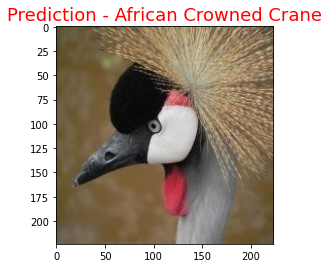

In [ ]:
predict_image("/content/images to test/2.jpg", model_0)

In [ ]:
#load pre-trained Inceptionv3
pre_trained = InceptionV3(include_top=False, input_shape=img_shape, pooling='avg')

for layer in pre_trained.layers:
  layer.trainable = False
  

87910968/87910968 [==============================] - 3s 0us/step


In [ ]:
x = pre_trained.output
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs = pre_trained.input, outputs = predictions)
model.compile(optimizer=Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 229, 229, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 114, 114, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 114, 114, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
STEP_SIZE_TRAIN = train_data.n // train_data.batch_size
STEP_SIZE_VALID = val_data.n // val_data.batch_size

history = model.fit_generator(train_data,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = val_data,
                    validation_steps = STEP_SIZE_VALID,
                    epochs = 10,
                    verbose = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/10
1771/1771 [==============================] - 832s 463ms/step - loss: 2.3401 - accuracy: 0.4968 - val_loss: 1.4741 - val_accuracy: 0.6263


KeyboardInterrupt: ignored

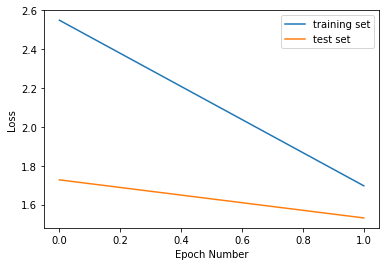

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label = 'training set')
plt.plot(history.history['val_loss'], label='test set')
plt.legend()

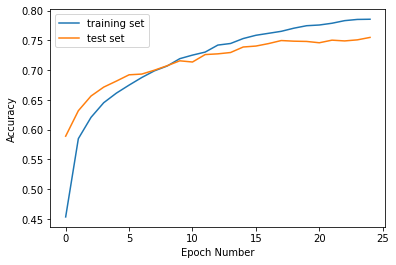

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='training set')
plt.plot(history.history['val_accuracy'], label='test set')
plt.legend()

In [ ]:
model_name = 'bird_classificaton_inceptionv3.h5'
model.save(model_name, save_format='h5')

In [ ]:
class_map = train_data.class_indices
classes = []
for key in class_map.keys():
    classes.append(key)
print(classes)

['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'AFRICAN PIED HORNBILL', 'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN FLAMINGO', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'AMERICAN WIGEON', 'AMETHYST WOODSTAR', 'ANDEAN GOOSE', 'ANDEAN LAPWING', 'ANDEAN SISKIN', 'ANHINGA', 'ANIANIAU', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ANTILLEAN EUPHONIA', 'APAPANE', 'APOSTLEBIRD', 'ARARIPE MANAKIN', 'ASHY STORM PETREL', 'ASHY THRUSHBIRD', 'ASIAN CRESTED IBIS', 'ASIAN DOLLARD BIRD', 'AUCKLAND SHAQ', 'AUSTRAL CANASTERO', 'AUSTRALASIAN FIGBIRD', 'AVADAVAT', 'AZARAS SPINETAIL', 'AZURE BREASTED PITTA', 'AZURE JAY', 'AZURE TANAGER', 'AZURE TIT', 'BAIKAL TEAL', 'BALD EAGLE', 'BALD IBIS', 'BALI STARLING', 'BALTIMORE ORIOLE', 'BANANAQUIT', 'BAN

In [ ]:
fh = open('label.txt', 'w')
i = 0
for word in classes:
  fh.write("%s\n" % word)
  i = i+1
fh.close()

In [ ]:
from tensorflow.keras.applications.inception_v3 import decode_predictions
from IPython.display import IFrame
def predict_image(filename, model):
    img_ = image.load_img(filename, target_size=(229, 229, 3))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.
    
    prediction = model.predict(img_processed)
    # label = decode_predictions(prediction)
    # label = label[0][0]
    # stringprint = "%.1f" % round(label[2]*100, 1)

    
    index = np.argmax(prediction)
    print(classes[index])
    strr="https://en.wikipedia.org/wiki/"
    strr=strr+str(classes[index]).title()
    print(strr)
    IFrame(strr,width=1200,height=300)
    plt.title("Prediction - {}".format(str(classes[index]).title()), size=18, color='red')
    plt.imshow(img_array)
    # print(prediction)
    print(index)
  

1/1 [==============================] - 0s 23ms/step
MASKED BOOBY
https://en.wikipedia.org/wiki/Masked Booby
308


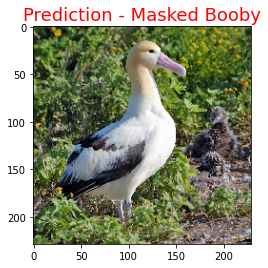

In [ ]:
predict_image('/content/drive/MyDrive/AVES/Birds.jpg' ,model)

1/1 [==============================] - 0s 27ms/step
ALBATROSS
https://en.wikipedia.org/wiki/Albatross
8


TypeError: ignored

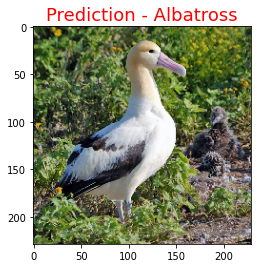

In [ ]:
cnn_feature=predict_image("/content/drive/MyDrive/AVES/Birds.jpg",model)
label=decode_predictions
stringprint ="%.1f" % round(label[2]*100,1)
plt.title(label[1] + " is " + str(stringprint) + "%", fontsize=15)
plt.axis('off')
plt.show()
strr="https://en.wikipedia.org/wiki/"
print(strr)
print(label[1])
strr=strr+label[1]
print(strr)
IFrame(strr,width=1200,height=300)